In [12]:
import pydot
import numpy as np 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
import keras
import numpy as np 

### Task 4

Create your own simple architecture and train CNN on [MNIST](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset. Note that MNIST is 1 color channel dataset.
Test it on some hard images from the web, [such as](https://www.wpclipart.com/education/animal_numbers/animal_number_2.png).

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_rows, img_cols = 28, 28

In [3]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Преобразование размерности изображений
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [6]:
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
# Создаем последовательную модель
model_3 = Sequential()

model_3.add(Conv2D(75, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(100, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(120, kernel_size=(3, 3), input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))
model_3.add(Flatten())
model_3.add(Dense(500, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

In [9]:
model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 75)        750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 100)       67600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 100)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 120)         108120    
__________

In [ ]:
# Обучаем сеть
#model_3.fit(X_train, Y_train, batch_size=128, epochs=2, validation_split=0.2, verbose=1)
#model_3.save('trained_model_4')
#model_3.save_weights('trained_model_4_weights')

In [10]:
from keras.models import load_model
model_3 = load_model('trained_model_4')
model_3.load_weights('trained_model_4_weights')

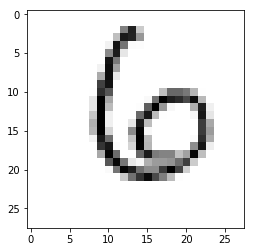

In [15]:
img = X_test[100]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
plt.imshow(255 - img.reshape((28,28)), cmap='gray')

In [16]:
model_3.predict(img.reshape((1, 28,28,1))).argmax()

6

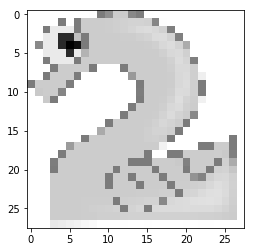

In [18]:
hard_image = cv2.imread('animal_number_2.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape(28,28)
cv2.normalize(hard_image,  hard_image, 0, 255, cv2.NORM_MINMAX)
plt.imshow(hard_image, cmap='gray')

In [19]:
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

0

### Task 5

Augment MNIST data using [ImageDataGenerator](https://keras.io/preprocessing/image/) and color inversion + visualize (or save) augmented images.
Train our model on augmented data and compare the results on your images from the web.

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
#в качестве аугментированных данных будем использовать инвёрснутые изображения
X_train_inverted = 255 - X_train

In [26]:
X_train_all = np.concatenate((X_train, X_train_inverted), axis=0)
Y_train_all = np.concatenate((Y_train, Y_train), axis=0)

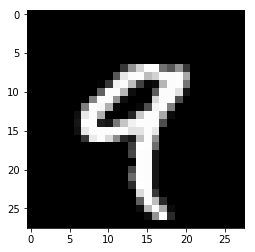

In [27]:
img = X_train_all[60004]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)

plt.imshow(255 - img.reshape((28,28)), cmap='gray')


In [28]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

In [29]:
datagen.fit(X_train_inverted)

In [46]:
# model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# model_3.fit_generator(datagen.flow(X_train_inverted, Y_train, batch_size=128),
#                     steps_per_epoch=len(X_train_inverted)/128, epochs=3)
# model_3.save('trained_model_4_with_generator')
# model_3.save_weights('trained_model_4_weights_with_generator')

Epoch 1/3
469/468 [==============================] - 2227s 5s/step - loss: 0.9873 - acc: 0.6873
Epoch 2/3
469/468 [==============================] - 2365s 5s/step - loss: 0.5059 - acc: 0.8353
Epoch 3/3
469/468 [==============================] - 2234s 5s/step - loss: 0.4181 - acc: 0.8663


*Артемий*, как ты можешь видеть в клетке выше, вот эти несчастные 3 эпохи тренировались у меня почти 3 часа. Понятно, что из-за этого точность получилась такая себе. Это нормально, что на core i7@2.2Ghz, 8Gb RAM так долго тренится?  

In [30]:
from keras.models import load_model
model_3 = load_model('trained_model_4_with_generator')
model_3.load_weights('trained_model_4_weights_with_generator')

На обычных цифрах работает более-менее...

In [36]:
for i in range(10):
    ind = 23333+i
    rand = X_train_all[ind]
    cv2.normalize(rand,  rand, 0, 255, cv2.NORM_MINMAX)
    print(Y_train_all[ind].argmax())
    predicted = model_3.predict(255 - rand.reshape((1, 28,28,1))).argmax()
    print('predicted = {0}'.format(predicted))
    

1
predicted = 1
7
predicted = 7
2
predicted = 2
5
predicted = 5
3
predicted = 3
3
predicted = 5
4
predicted = 5
1
predicted = 1
5
predicted = 5
1
predicted = 1


А вот с этими сложными изображениями всё равно беда. 
Вот единиицу предсказывает как 7. Ну там на картинке реально на 7 похоже :)

In [39]:
hard_image = cv2.imread('animal_number_1.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))

In [40]:
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

7

А вот со всеми прочими всё очень плохо

In [41]:
hard_image = cv2.imread('animal_number_2.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5

In [42]:
hard_image = cv2.imread('animal_number_3.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5

In [43]:
hard_image = cv2.imread('animal_number_4.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5

In [44]:
hard_image = cv2.imread('animal_number_5.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5

In [45]:
hard_image = cv2.imread('animal_number_6.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5

In [46]:
hard_image = cv2.imread('animal_number_7.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5

In [47]:
hard_image = cv2.imread('animal_number_8.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5

In [48]:
hard_image = cv2.imread('animal_number_9.png', 0)
hard_image = cv2.resize(hard_image, (28, 28))
hard_image = hard_image.reshape((28,28,1))
model_3.predict(hard_image.reshape((1, 28,28,1))).argmax()

5